Download dos dados disponíveis no link do github: https://github.com/reisaraujo-miguel/trab2-ia-censo-ed-2023/tree/main


In [3]:
import pandas as pd

In [4]:
df = pd.read_csv("microdados-clean.csv", encoding='latin1', sep=';')
df

,IN_AGUA_POTAVEL,IN_AGUA_INEXISTENTE,IN_ENERGIA_INEXISTENTE,IN_ESGOTO_INEXISTENTE,IN_AUDITORIO,IN_BANHEIRO,IN_BIBLIOTECA,IN_COZINHA,IN_LABORATORIO_CIENCIAS,IN_LABORATORIO_INFORMATICA,...,IN_MATERIAL_PED_MULTIMIDIA,IN_MATERIAL_PED_CIENTIFICO,IN_MATERIAL_PED_DIFUSAO,IN_MATERIAL_PED_MUSICAL,IN_MATERIAL_PED_JOGOS,IN_MATERIAL_PED_ARTISTICAS,IN_MATERIAL_PED_PROFISSIONAL,IN_MATERIAL_PED_DESPORTIVA,IN_MATERIAL_PED_ETNICO,IN_MATERIAL_PED_BIL_SURDOS
0,1,0,0,0,1,1,1,1,0,1,...,1,0,0,0,1,1,0,1,0,0
1,1,0,0,0,0,1,0,1,0,0,...,1,0,1,0,1,1,0,1,0,0
2,1,0,0,0,0,1,1,1,1,1,...,1,1,1,0,1,1,0,1,0,0
3,1,0,0,0,0,1,1,1,0,0,...,0,0,0,0,1,0,0,1,0,0
4,1,0,0,0,0,1,1,1,0,0,...,1,0,1,0,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163850,1,0,0,0,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
163851,1,0,0,0,1,1,1,1,1,1,...,1,1,1,0,1,1,0,0,0,1
163852,1,0,0,0,0,1,0,0,1,1,...,0,0,1,1,1,0,0,1,0,0
163853,1,0,0,0,1,1,1,1,1,1,...,1,1,1,1,1,1,0,1,1,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163855 entries, 0 to 163854
Data columns (total 69 columns):
 #   Column                          Non-Null Count   Dtype
---  ------                          --------------   -----
 0   IN_AGUA_POTAVEL                 163855 non-null  int64
 1   IN_AGUA_INEXISTENTE             163855 non-null  int64
 2   IN_ENERGIA_INEXISTENTE          163855 non-null  int64
 3   IN_ESGOTO_INEXISTENTE           163855 non-null  int64
 4   IN_AUDITORIO                    163855 non-null  int64
 5   IN_BANHEIRO                     163855 non-null  int64
 6   IN_BIBLIOTECA                   163855 non-null  int64
 7   IN_COZINHA                      163855 non-null  int64
 8   IN_LABORATORIO_CIENCIAS         163855 non-null  int64
 9   IN_LABORATORIO_INFORMATICA      163855 non-null  int64
 10  IN_LABORATORIO_EDUC_PROF        163855 non-null  int64
 11  IN_QUADRA_ESPORTES              163855 non-null  int64
 12  IN_REFEITORIO                   163855 non-n

In [6]:
df['QT_SALAS_UTILIZADAS']

0          7
1          6
2         42
3          1
4         15
          ..
163850    15
163851    50
163852    16
163853    20
163854     8
Name: QT_SALAS_UTILIZADAS, Length: 163855, dtype: int64

# Pré-processamento dos dados

Precisamos escalar os dados quantitativos entre 0 e 1, já que os dados são um misto de dados binários e escalares. Para isso vamos usar o MinMaxScaler do scikit-learn, que utiliza a seguinte equação:

X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))

X_scaled = X_std * (max - min) + min

In [7]:
from sklearn.preprocessing import MinMaxScaler

In [8]:
# scale quantitive data between 0-1

scaler = MinMaxScaler()

qt_columns = [col for col in df.columns if col.startswith("QT")]

#df_scaled = df

for column in qt_columns:
    df[column] = scaler.fit_transform(df[[column]])

qt_columns

['QT_SALAS_UTILIZADAS',
 'QT_SALAS_UTILIZA_CLIMATIZADAS',
 'QT_SALAS_UTILIZADAS_ACESSIVEIS',
 'QT_EQUIP_DVD',
 'QT_EQUIP_SOM',
 'QT_EQUIP_TV',
 'QT_EQUIP_LOUSA_DIGITAL',
 'QT_EQUIP_MULTIMIDIA',
 'QT_DESKTOP_ALUNO',
 'QT_COMP_PORTATIL_ALUNO',
 'QT_TABLET_ALUNO',
 'QT_PROF_SERVICOS_GERAIS',
 'QT_PROF_BIBLIOTECARIO',
 'QT_PROF_SAUDE',
 'QT_PROF_ALIMENTACAO',
 'QT_PROF_SEGURANCA',
 'QT_PROF_ASSIST_SOCIAL',
 'QT_PROF_TRAD_LIBRAS']

In [9]:
df['QT_SALAS_UTILIZADAS']

0         0.002524
1         0.002103
2         0.017249
3         0.000000
4         0.005890
            ...   
163850    0.005890
163851    0.020614
163852    0.006310
163853    0.007993
163854    0.002945
Name: QT_SALAS_UTILIZADAS, Length: 163855, dtype: float64

# K-Prototypes

In [10]:
binary_columns = [i for i, col in enumerate(df.columns) if not col.startswith("QT")]

binary_columns

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 32,
 33,
 34,
 35,
 36,
 45,
 46,
 47,
 48,
 49,
 50,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68]

# Método do cotovelo para K-Prototypes

In [11]:
from kmodes.kprototypes import KPrototypes
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# 3 clusters

In [12]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np

In [13]:
jobs=4

In [28]:
kp = KPrototypes(n_clusters=3, init='Cao', verbose=1, n_jobs=jobs)

data_array = df.values

clusters = kp.fit_predict(data_array, categorical=binary_columns)

df['CLUSTER_LABELS'] = clusters

Initialization method and algorithm are deterministic. Setting n_init to 1.
Best run was number 6


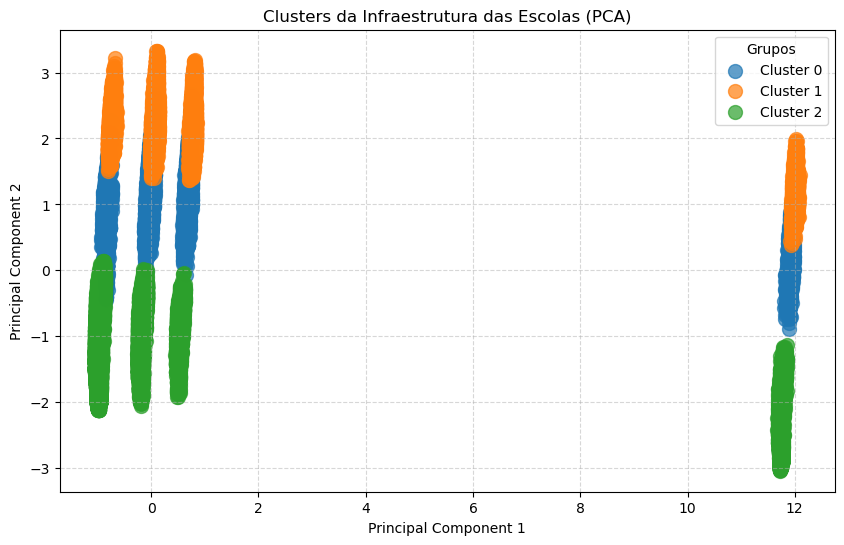

In [30]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(data_array)

pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['Cluster'] = clusters

plt.figure(figsize=(10, 6))

unique_clusters = np.unique(clusters)

for cluster_id in unique_clusters:
    subset = pca_df[pca_df['Cluster'] == cluster_id]
    
    plt.scatter(
        subset['PC1'], 
        subset['PC2'],  
        label=f'Cluster {cluster_id}', 
        alpha=0.7,
        s=100
    )

plt.title('Clusters da Infraestrutura das Escolas (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title="Grupos")
plt.grid(True, linestyle='--', alpha=0.5)

plt.savefig('pca-plot-3clusters.png', bbox_inches='tight')
plt.show()

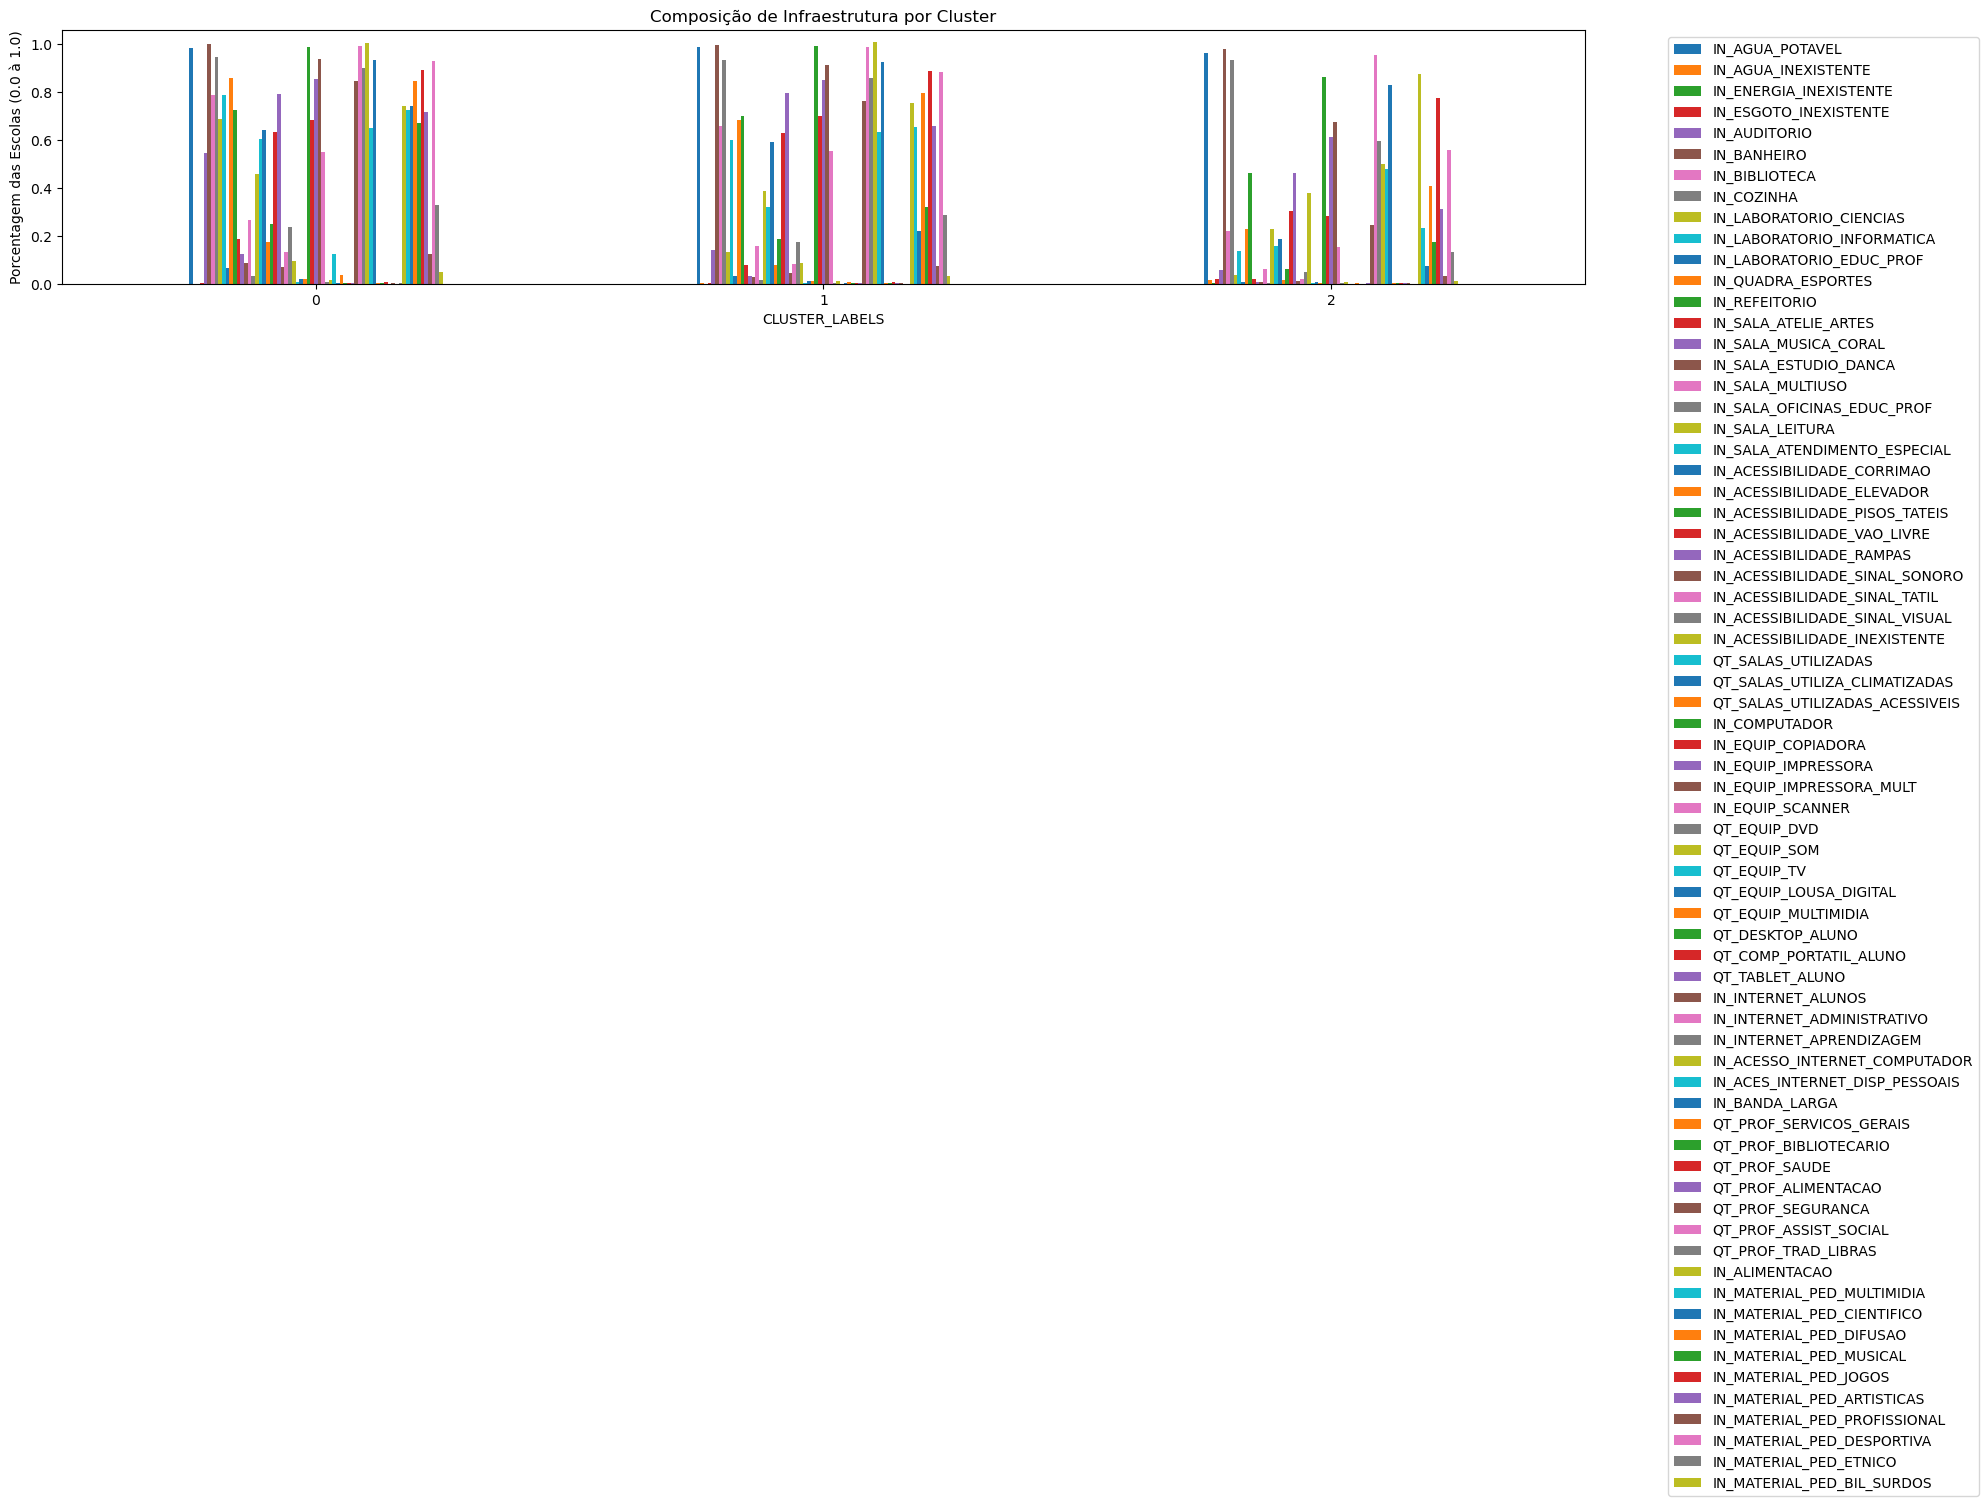

In [50]:
profile = df.groupby('CLUSTER_LABELS')[[col for col in df.columns if not col == 'CLUSTER_LABELS']].mean()

profile.plot(kind='bar', figsize=(20, 10))
plt.title('Composição de Infraestrutura por Cluster')
plt.ylabel('Porcentagem das Escolas (0.0 à 1.0)')
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left') # Move legend outside
plt.tight_layout()
plt.savefig('clusters-plot-3clusters.png', bbox_inches='tight')
plt.show()

# 4 clusters 

# 5 clusters

In [29]:
cluster_counts = df['CLUSTER_LABELS'].value_counts().sort_index().to_dict()

print(cluster_counts)

{0: 19272, 1: 40927, 2: 103656}


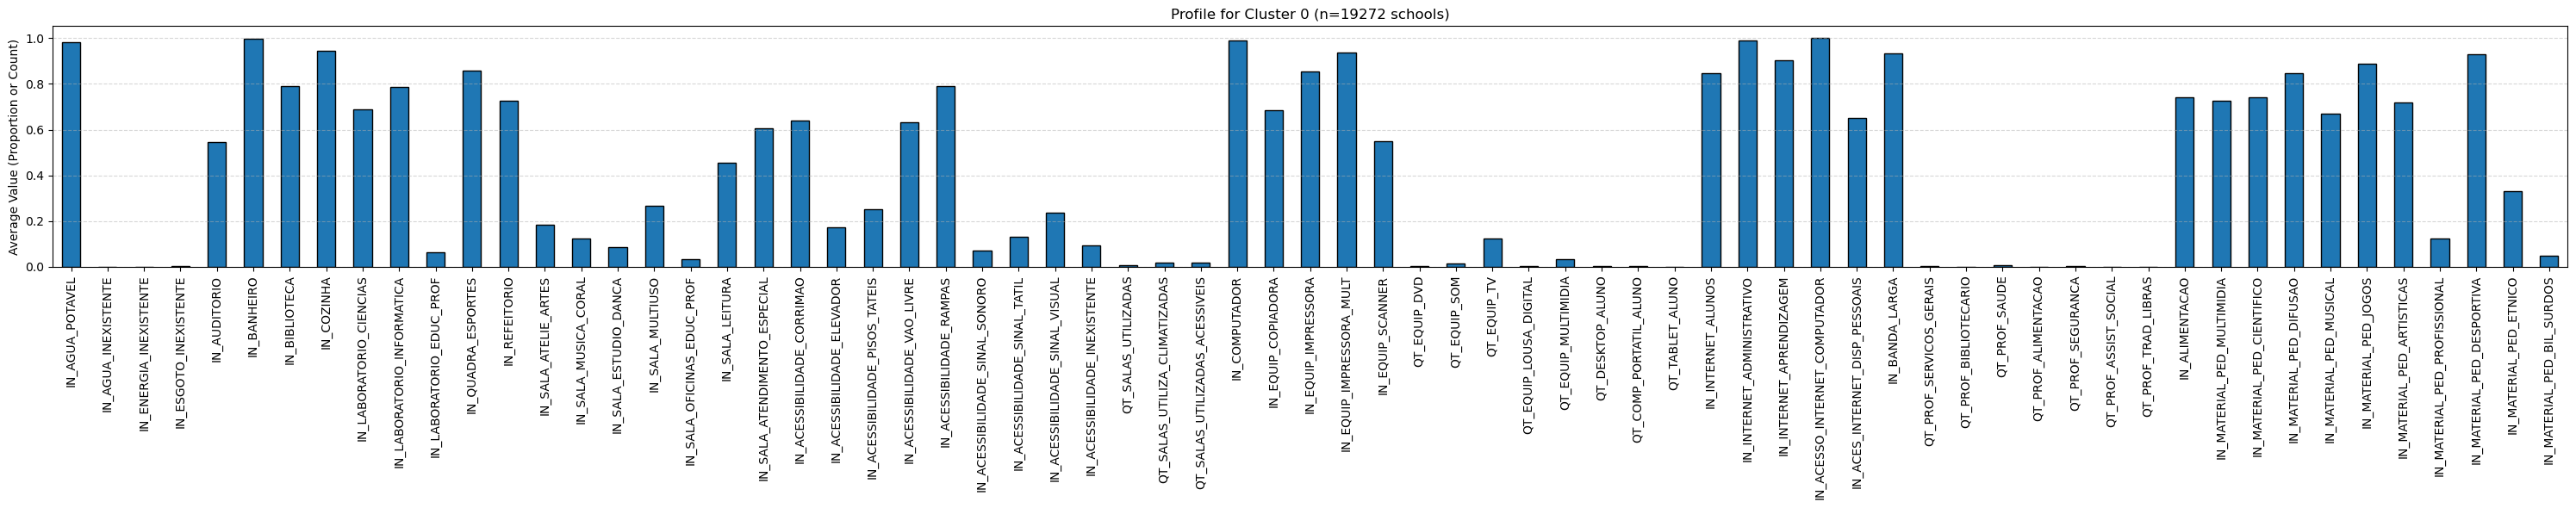

In [47]:
cluster_0 = df[df['CLUSTER_LABELS'] == 0]

cluster_0_means = cluster_0.drop(columns='CLUSTER_LABELS').mean()

plt.figure(figsize=(30, 6))
cluster_0_means.plot(kind='bar', edgecolor='black')

plt.title(f'Profile for Cluster 0 (n={len(cluster_0)} schools)')
plt.ylabel('Average Value (Proportion or Count)')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

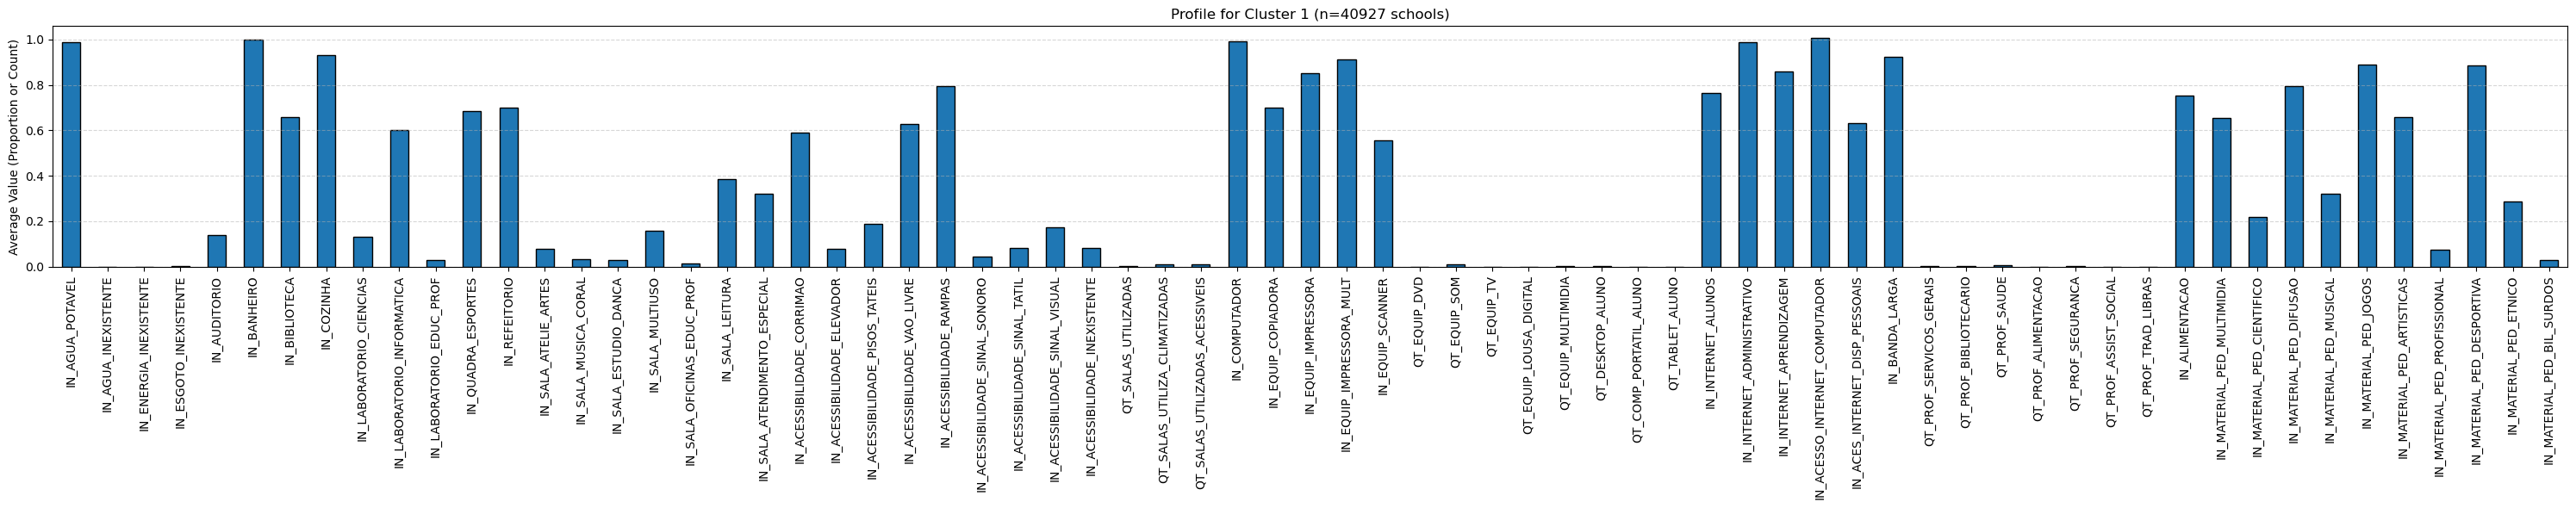

In [51]:
cluster_1 = df[df['CLUSTER_LABELS'] == 1]

cluster_1_means = cluster_1.drop(columns='CLUSTER_LABELS').mean()

plt.figure(figsize=(30, 6))
cluster_1_means.plot(kind='bar', edgecolor='black')

plt.title(f'Profile for Cluster 1 (n={len(cluster_1)} schools)')
plt.ylabel('Average Value (Proportion or Count)')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

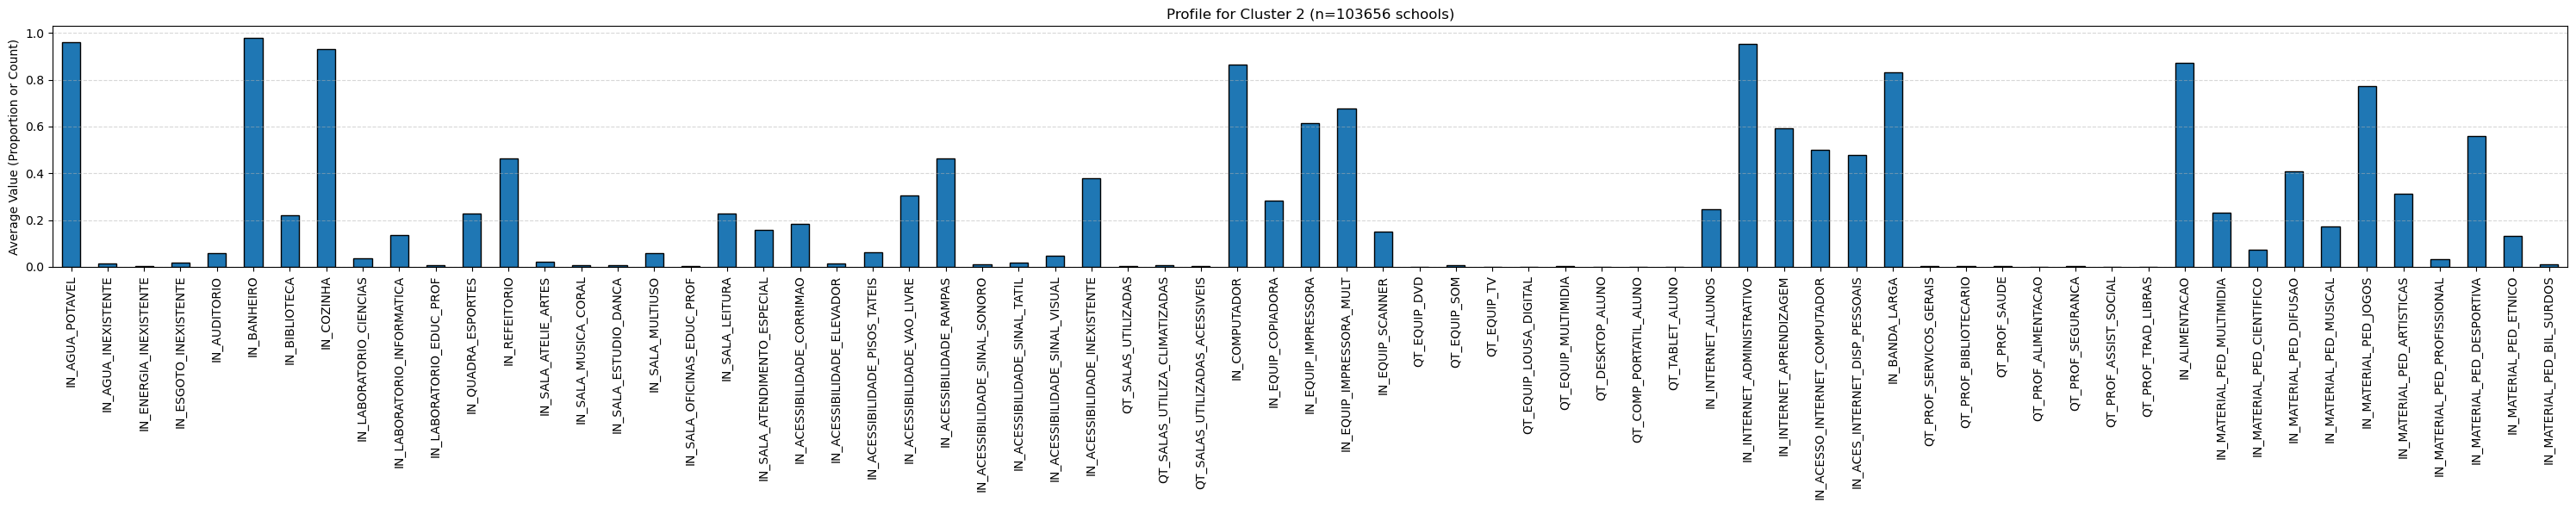

In [52]:
cluster_2 = df[df['CLUSTER_LABELS'] == 2]

cluster_2_means = cluster_2.drop(columns='CLUSTER_LABELS').mean()

plt.figure(figsize=(30, 6))
cluster_2_means.plot(kind='bar', edgecolor='black')

plt.title(f'Profile for Cluster 2 (n={len(cluster_2)} schools)')
plt.ylabel('Average Value (Proportion or Count)')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()